In [1]:
import numpy as np
import pandas as pd
import os

from sklearn import preprocessing
from scipy.stats import pearsonr

# machinelearning-supervised
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_excel(r'C:\Users\user\Desktop\research\Median\all_songs_valance_median.xlsx')

In [3]:
dataset.head()

,song id,Valance Mean,Magnitude Spectrum Overall Standard Deviation Median,Power Spectrum Overall Standard Deviation Median,Spectral Centroid Overall Standard Deviation,Spectral Rolloff Point Overall Standard Deviation,Spectral Flux Overall Standard Deviation,Compactness Overall Standard Deviation,Spectral Variability Overall Standard Deviation,Root Mean Square Overall Standard Deviation,...,Strongest Frequency Via Zero Crossings Overall Average,Strongest Frequency Via Spectral Centroid Overall Average,Strongest Frequency Via FFT Maximum Overall Average,MFCC Overall Average Median,LPC Overall Average Median,Method of Moments Overall Average Median,Peak Based Spectral Smoothness Overall Average,Relative Difference Function Overall Average,Area Method of Moments Overall Average Median,Area Method of Moments of MFCCs Overall Average Median
0,2,-0.215511,0.000512,0.000902,7.500,0.08049,0.001279,179.9,0.000916,0.03351,...,702.0,466.6,201.5,0.9785,0.002195,3015.0,52.680,-4.886,17903.5,-685.50
1,3,-0.265855,0.000165,0.000077,3.087,0.02418,0.000932,220.4,0.001749,0.06338,...,248.4,145.1,103.0,0.2899,0.028710,1920.0,12.250,-4.901,46532.5,-1070.00
2,4,0.155210,0.000469,0.000596,10.380,0.09073,0.002734,189.6,0.002093,0.07633,...,699.2,476.4,248.5,0.5334,-0.000103,2773.0,53.620,-3.973,73270.0,-1175.20
3,5,0.140160,0.000584,0.001263,9.839,0.08717,0.001256,185.4,0.001275,0.04761,...,663.7,512.9,350.4,-0.4053,0.036430,2663.0,49.900,-4.497,107125.0,-1149.95
4,7,0.332455,0.000380,0.000349,3.147,0.01944,0.003971,188.4,0.001925,0.06242,...,228.9,157.9,132.3,0.6664,0.091785,2676.0,8.885,-3.943,134675.0,-1307.25


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 51 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   song id                                                               1744 non-null   int64  
 1   Valance Mean                                                          1744 non-null   float64
 2   Magnitude Spectrum Overall Standard Deviation Median                  1744 non-null   float64
 3   Power Spectrum Overall Standard Deviation Median                      1744 non-null   float64
 4   Spectral Centroid Overall Standard Deviation                          1744 non-null   float64
 5   Spectral Rolloff Point Overall Standard Deviation                     1744 non-null   float64
 6   Spectral Flux Overall Standard Deviation                              1744 non-null   float64
 7

In [5]:
dataset.describe()

,song id,Valance Mean,Magnitude Spectrum Overall Standard Deviation Median,Power Spectrum Overall Standard Deviation Median,Spectral Centroid Overall Standard Deviation,Spectral Rolloff Point Overall Standard Deviation,Spectral Flux Overall Standard Deviation,Compactness Overall Standard Deviation,Spectral Variability Overall Standard Deviation,Root Mean Square Overall Standard Deviation,...,Strongest Frequency Via Zero Crossings Overall Average,Strongest Frequency Via Spectral Centroid Overall Average,Strongest Frequency Via FFT Maximum Overall Average,MFCC Overall Average Median,LPC Overall Average Median,Method of Moments Overall Average Median,Peak Based Spectral Smoothness Overall Average,Relative Difference Function Overall Average,Area Method of Moments Overall Average Median,Area Method of Moments of MFCCs Overall Average Median
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,...,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1.744000e+03,1.744000e+03
mean,1062.077982,0.100370,0.000519,0.001244,12.520193,0.104894,0.001814,193.779702,0.001257,0.046038,...,812.691571,625.988744,363.693687,-0.251555,0.015593,2886.285780,60.192838,-4.766136,3.093356e+07,2.802243e+06
std,584.299005,0.232706,0.000433,0.002430,7.969277,0.062241,0.002404,39.526210,0.000690,0.025026,...,353.922945,299.959949,219.586681,0.667648,0.031013,1315.595428,29.837115,0.723120,1.844877e+07,1.619081e+06
min,2.000000,-0.637343,0.000001,0.000000,1.168000,0.006167,0.000008,127.000000,0.000123,0.004594,...,146.700000,71.140000,30.000000,-4.118000,-0.142600,102.900000,1.273000,-18.110000,1.790350e+04,-1.885000e+03
25%,536.750000,-0.062663,0.000242,0.000196,6.867500,0.058623,0.000519,167.125000,0.000791,0.029415,...,552.250000,417.075000,223.875000,-0.546000,-0.001406,1985.750000,39.322500,-5.129250,1.481312e+07,1.413112e+06
50%,1128.500000,0.110540,0.000439,0.000563,10.675000,0.095780,0.000970,187.000000,0.001054,0.038970,...,752.850000,568.450000,315.900000,-0.183900,0.013076,2950.000000,54.925000,-4.743000,3.094850e+07,2.804400e+06
75%,1564.250000,0.280368,0.000659,0.001202,15.870000,0.138225,0.002022,211.500000,0.001563,0.056393,...,1005.000000,760.475000,443.575000,0.160625,0.034487,3838.250000,75.762500,-4.347750,4.673900e+07,4.204488e+06
max,2000.000000,0.637600,0.004720,0.054260,58.910000,0.354700,0.031690,550.900000,0.005137,0.184000,...,2888.000000,2739.000000,2970.000000,1.636000,0.131700,6789.000000,196.300000,-2.585000,6.379000e+07,5.584350e+06


In [6]:
dataset.corr()

,song id,Valance Mean,Magnitude Spectrum Overall Standard Deviation Median,Power Spectrum Overall Standard Deviation Median,Spectral Centroid Overall Standard Deviation,Spectral Rolloff Point Overall Standard Deviation,Spectral Flux Overall Standard Deviation,Compactness Overall Standard Deviation,Spectral Variability Overall Standard Deviation,Root Mean Square Overall Standard Deviation,...,Strongest Frequency Via Zero Crossings Overall Average,Strongest Frequency Via Spectral Centroid Overall Average,Strongest Frequency Via FFT Maximum Overall Average,MFCC Overall Average Median,LPC Overall Average Median,Method of Moments Overall Average Median,Peak Based Spectral Smoothness Overall Average,Relative Difference Function Overall Average,Area Method of Moments Overall Average Median,Area Method of Moments of MFCCs Overall Average Median
song id,1.000000,0.239776,-0.188191,-0.221292,0.081196,0.114709,-0.315520,-0.143303,-0.391483,-0.403690,...,0.097338,0.061005,-0.064706,0.110932,-0.111934,0.184543,0.069942,-0.115643,0.995418,0.997213
Valance Mean,0.239776,1.000000,0.263812,0.117656,0.270076,0.317914,0.139272,0.180560,0.070269,0.065488,...,0.242072,0.174402,-0.045036,0.210567,-0.207768,0.445871,0.193100,0.337850,0.235014,0.238131
Magnitude Spectrum Overall Standard Deviation Median,-0.188191,0.263812,1.000000,0.889843,0.471820,0.536125,0.621498,0.103809,0.489747,0.485645,...,0.481431,0.409707,0.034352,0.265534,-0.307394,0.578014,0.378164,0.511639,-0.187071,-0.188088
Power Spectrum Overall Standard Deviation Median,-0.221292,0.117656,0.889843,1.000000,0.329318,0.352300,0.615949,0.069236,0.443121,0.438042,...,0.334740,0.308896,0.078145,0.131003,-0.188531,0.335220,0.267913,0.389821,-0.221473,-0.222323
Spectral Centroid Overall Standard Deviation,0.081196,0.270076,0.471820,0.329318,1.000000,0.948190,0.223168,0.256060,0.255955,0.263077,...,0.593544,0.597032,0.274176,0.151735,-0.207724,0.606871,0.319404,0.171021,0.077647,0.079320
Spectral Rolloff Point Overall Standard Deviation,0.114709,0.317914,0.536125,0.352300,0.948190,1.000000,0.236462,0.212062,0.238289,0.238640,...,0.597601,0.552266,0.122129,0.235881,-0.244518,0.732485,0.313602,0.230132,0.111025,0.112624
Spectral Flux Overall Standard Deviation,-0.315520,0.139272,0.621498,0.615949,0.223168,0.236462,1.000000,0.266838,0.844419,0.823347,...,0.029306,0.007454,-0.097256,0.152674,-0.076837,0.211634,-0.042137,0.541903,-0.313892,-0.314011
Compactness Overall Standard Deviation,-0.143303,0.180560,0.103809,0.069236,0.256060,0.212062,0.266838,1.000000,0.332975,0.343348,...,-0.139758,-0.070959,-0.006672,0.014190,0.089796,-0.000712,-0.231165,0.034021,-0.148132,-0.144647
Spectral Variability Overall Standard Deviation,-0.391483,0.070269,0.489747,0.443121,0.255955,0.238289,0.844419,0.332975,1.000000,0.993692,...,-0.106182,-0.100971,-0.133531,0.154891,0.007313,0.134451,-0.211650,0.507821,-0.387783,-0.387183
Root Mean Square Overall Standard Deviation,-0.403690,0.065488,0.485645,0.438042,0.263077,0.238640,0.823347,0.343348,0.993692,1.000000,...,-0.091416,-0.078698,-0.095704,0.130105,0.022806,0.118300,-0.190278,0.475019,-0.399380,-0.398978


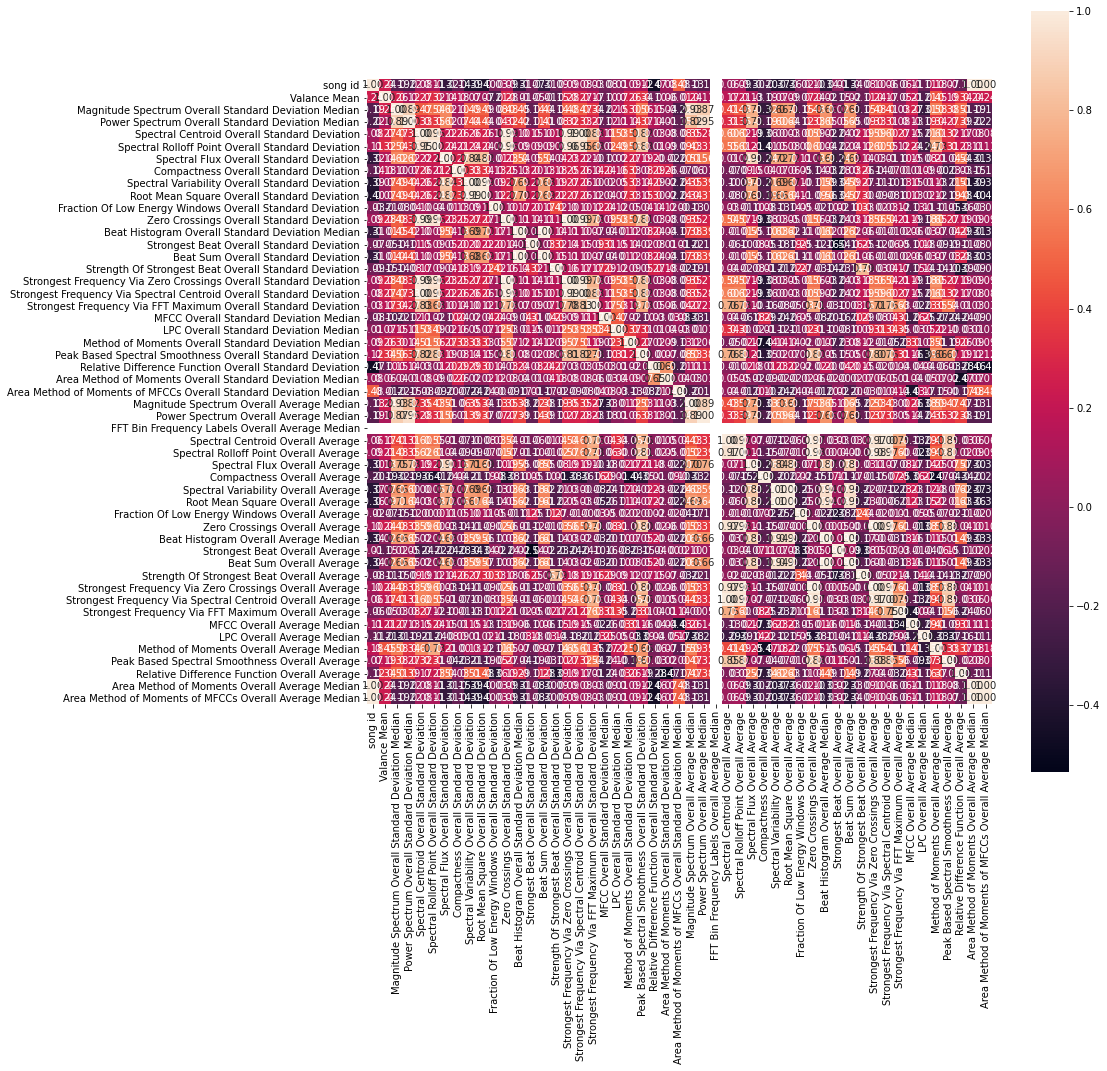

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = dataset.corr()
plt.figure(figsize=(14,14))
g = sns.heatmap(correlations,cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In [8]:
iv = dataset[dataset.columns.drop(["Valance Mean", "song id"])]
dv = (dataset["Valance Mean"])

In [9]:
iv.shape

(1744, 49)

In [10]:
dv.shape

(1744,)

In [11]:
from sklearn.feature_selection import SelectKBest,f_classif, f_regression
fvalue_selector = SelectKBest(score_func=f_regression, k="all")

fvalue_selector.fit(iv, dv)
names = iv.columns.values[fvalue_selector.get_support()]
scores = fvalue_selector.scores_[fvalue_selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores,columns= ['Feature_name','F_Score'])
ns_df_sorted = ns_df.sort_values(['F_Score','Feature_name'], ascending = [False, True])
print(ns_df_sorted)

                                         Feature_name     F_Score
44           Method of Moments Overall Average Median  432.240071
20  Peak Based Spectral Smoothness Overall Standar...  227.238046
46       Relative Difference Function Overall Average  224.455887
3   Spectral Rolloff Point Overall Standard Deviation  195.858381
14  Strongest Frequency Via Zero Crossings Overall...  149.705192
9           Zero Crossings Overall Standard Deviation  149.704881
15  Strongest Frequency Via Spectral Centroid Over...  137.061367
2        Spectral Centroid Overall Standard Deviation  137.060803
0   Magnitude Spectrum Overall Standard Deviation ...  130.306723
19  Method of Moments Overall Standard Deviation M...  130.100194
39  Strongest Frequency Via Zero Crossings Overall...  108.433071
34                     Zero Crossings Overall Average  108.430798
48  Area Method of Moments of MFCCs Overall Averag...  104.721205
24          Magnitude Spectrum Overall Average Median  104.296347
47      Ar

c:\users\user\miniconda3\envs\tensorflow\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
c:\users\user\miniconda3\envs\tensorflow\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
c:\users\user\miniconda3\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\user\miniconda3\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\user\miniconda3\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [12]:
X = dataset.iloc[:, 2:50].values


y = dataset.iloc[:, 1].values

In [13]:
X.shape

(1744, 48)

In [14]:
y.shape

(1744,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,-0.232173,0.150940
1,0.277983,0.126506
2,0.463200,0.329513
3,0.160223,0.081580
4,-0.075506,-0.020175
...,...,...
170,-0.041917,0.089980
171,0.003650,-0.197661
172,-0.075500,0.191168
173,0.292817,0.255499


In [19]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 0.1415971677396978
Mean Squared Error: 0.030271802095690588
Root Mean Squared Error: 0.17398793663840775
Variance score: 0.3672022516587873


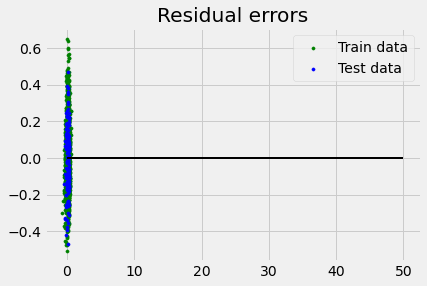

In [20]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [21]:
df.to_csv('file_name.csv')

In [22]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

36.72022516587873 %
